In [1]:
import pandas as pd
import numpy as np
#Encoding modules
import ast
import sys
sys.path.append('../modules')
from encoding_module import json_to_DF
from encoding_module import onehot_json
#Plots
from plot_module import barPlot
from plot_module import featureAnalysis
#API
import requests
import concurrent.futures
#NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#Ignore Warning
import warnings
warnings.filterwarnings("ignore")
#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_score
from scipy.sparse import csr_matrix
from tqdm import tqdm

In [2]:
import numpy as np 
import pandas as pd
import random
#plotting packages
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import seaborn as sns
#splitting data to train and test
from sklearn.model_selection import train_test_split
from scipy import stats as st
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
#model selection 
from sklearn.model_selection import GridSearchCV
#Scaling
from sklearn.preprocessing import StandardScaler
#metrics
from statistics import mean, stdev
import math
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#filter methods feature selection
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
#clustering 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
#sampling
from sklearn.utils import shuffle
from scipy.spatial import distance
from scipy.spatial.distance import pdist
#cross validation
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
#extra
import warnings
warnings.filterwarnings("ignore")
#larger dataframe 
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

In [3]:
def KmeansMethod(dataset,minK,maxK): 
    inertia = []
    silhouette_scores = []
    silhouette_dict = {}  # Dictionary to store silhouette scores
    k_values = range(minK, maxK)  # Test values of k from 2 to 10

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(dataset)
        inertia.append(kmeans.inertia_)
        silhouette_score_k = silhouette_score(dataset, kmeans.labels_)
        silhouette_scores.append(silhouette_score_k)
        silhouette_dict[k] = silhouette_score_k
        
    sorted_scores = sorted(silhouette_dict.items(), key=lambda x: x[1], reverse=True)

    # Print all silhouette scores in sorted order
    print("Silhouette scores (sorted in descending order):")
    for k, score in sorted_scores:
        print(f"Silhouette score for k={k}: {score}")
        
    # Plotting inertia and silhouette score
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia vs. Number of Clusters')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')

    plt.tight_layout()
    plt.show()

In [75]:
movies_metadata = pd.read_csv('../encoding/encoded/movies_metadata_encoded.csv')

In [76]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,Poland,Brazil,Switzerland,Argentina,Ireland,Czech Republic,Norway,Austria,Hungary,Greece,Turkey,Israel,Romania,South Africa,New Zealand,Taiwan,Portugal,Thailand,Serbia,Iran,Luxembourg,Philippines,Croatia,Iceland,Chile,Bulgaria,Estonia,Ukraine,Singapore,Bosnia and Herzegovina,Lithuania,Colombia,Slovenia,Indonesia,Morocco,Georgia,Peru,Slovakia,Latvia,United Arab Emirates,Egypt,Cuba,Kazakhstan,Venezuela,Soviet Union,Tunisia,Uruguay,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,svenska,한국어/조선말,Polski,广州话 / 廣州話,Magyar,العربية,suomi,Nederlands,No Language,Dansk,Český,עִבְרִית,Türkçe,ελληνικά,ภาษาไทย,Norsk,Latin,فارسی,Română,Srpski,தமிழ்,తెలుగు,Tiếng Việt,Íslenska,Hrvatski,اردو,Eesti,Український,বাংলা,Bahasa indonesia,Català,български език,Bosanski,ქართული,shqip,Afrikaans,Slovenčina,Lietuvikai,Slovenščin

In [77]:
need_to_scale = ['runtime','Vote','vote_count','popularity']

In [80]:
data_cluster = movies_metadata.copy()

In [81]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster[need_to_scale])

In [82]:
data_cluster.drop(['id', 'imdb_id','release_date'], axis=1,inplace = True)

Silhouette scores (sorted in descending order):
Silhouette score for k=10: 0.8294962898546584
Silhouette score for k=11: 0.797762009293563
Silhouette score for k=13: 0.7861259674868813
Silhouette score for k=12: 0.77983106884525
Silhouette score for k=15: 0.7487426320017865
Silhouette score for k=14: 0.7486895276581591
Silhouette score for k=16: 0.746326587674147
Silhouette score for k=17: 0.7438140866272546
Silhouette score for k=18: 0.7057783857886655
Silhouette score for k=19: 0.7049000451751631
Silhouette score for k=21: 0.7002388672078288
Silhouette score for k=22: 0.6715360300901888
Silhouette score for k=20: 0.6710734405661882
Silhouette score for k=23: 0.6623187769548532
Silhouette score for k=24: 0.6443177593979084
Silhouette score for k=25: 0.6211728589897857
Silhouette score for k=27: 0.6208170136714237
Silhouette score for k=26: 0.6057247095721651
Silhouette score for k=28: 0.6055657601503895
Silhouette score for k=29: 0.5857060135568023


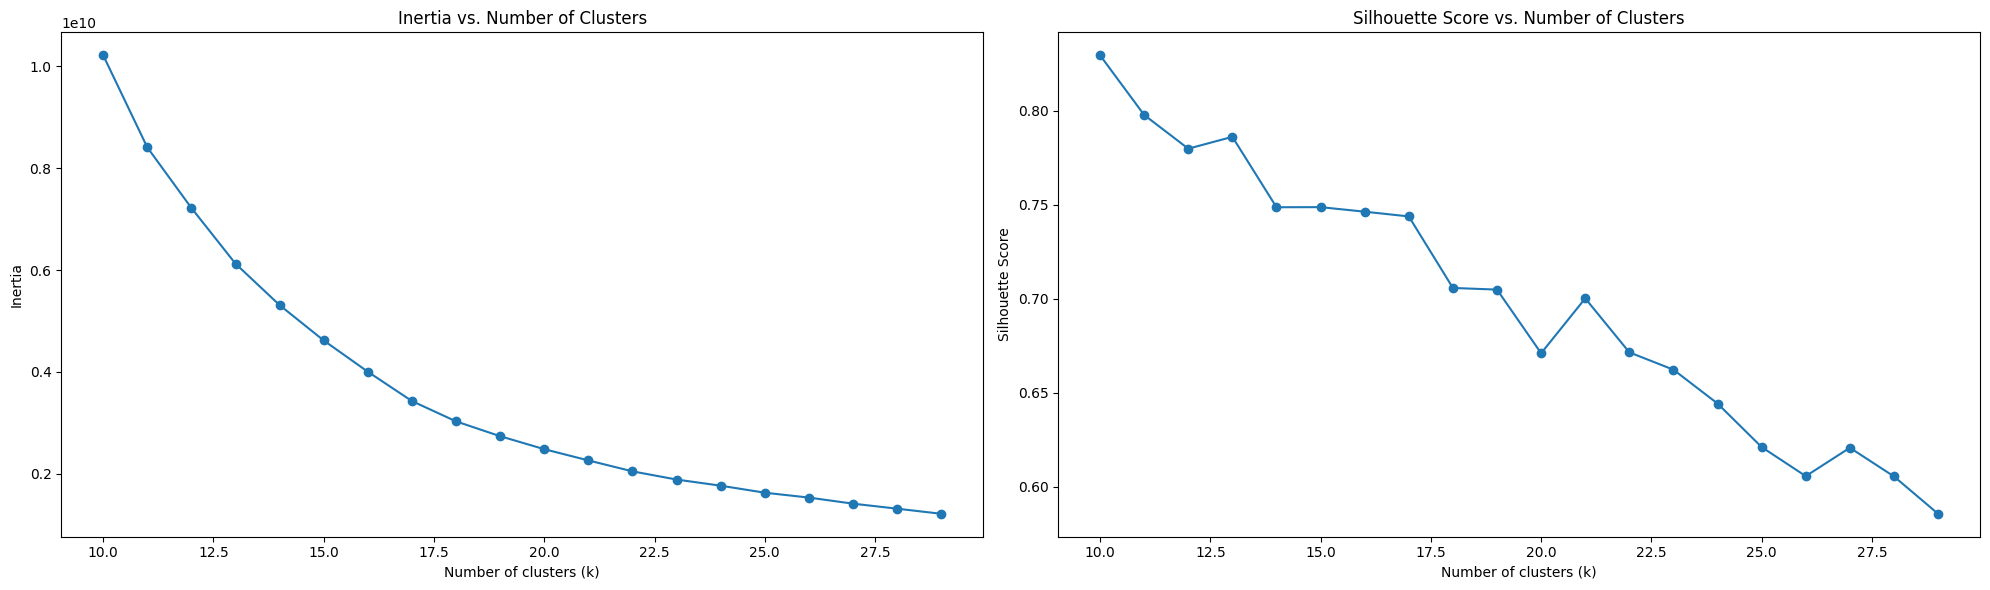

In [83]:
KmeansMethod(data_cluster,10,30)

In [26]:
rating = ['popularity','vote_average','vote_count','Vote']
data_cluster_rating = data_cluster[rating]

In [28]:
data_cluster.drop(['popularity','vote_average','vote_count','Vote'], axis=1,inplace = True)

Silhouette scores (sorted in descending order):
Silhouette score for k=3: 0.46671994335594147
Silhouette score for k=5: 0.46460093005015524
Silhouette score for k=2: 0.43980764832890457
Silhouette score for k=4: 0.42576448331723105
Silhouette score for k=6: 0.3985989769901461
Silhouette score for k=10: 0.39691498183384955
Silhouette score for k=9: 0.3897824121315176
Silhouette score for k=7: 0.3879538350582579
Silhouette score for k=8: 0.37976052779692526
Silhouette score for k=11: 0.34201177289640555


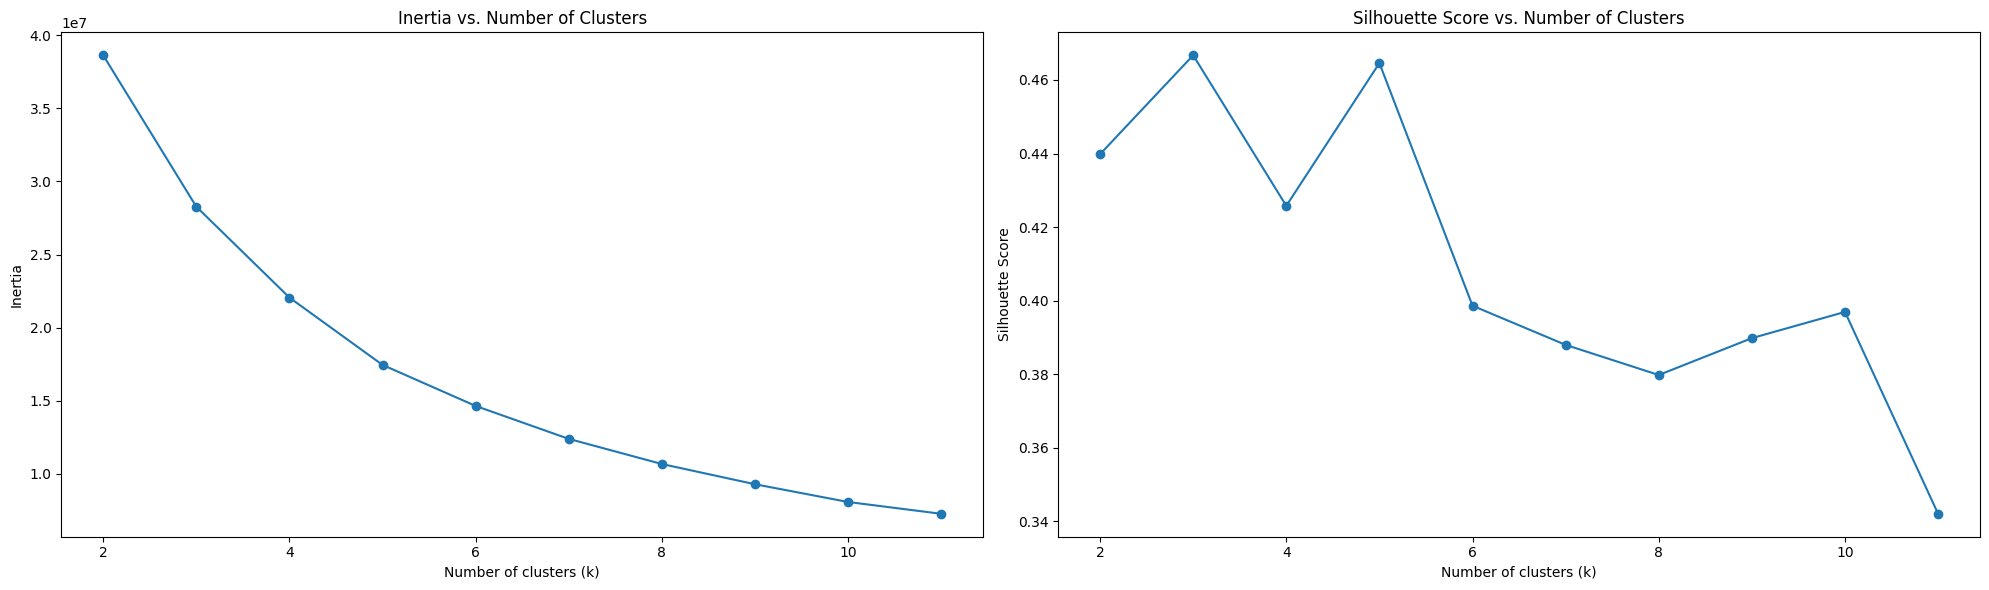

In [30]:
KmeansMethod(data_cluster,2,12)

In [63]:
countries = movies_metadata.columns.tolist()[171:248]
countries.append("id")

In [67]:
data = movies_metadata[countries]

In [66]:
country_df

,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,Poland,Brazil,Switzerland,Argentina,Ireland,Czech Republic,Norway,Austria,Hungary,Greece,Turkey,Israel,Romania,South Africa,New Zealand,Taiwan,Portugal,Thailand,Serbia,Iran,Luxembourg,Philippines,Croatia,Iceland,Chile,Bulgaria,Estonia,Ukraine,Singapore,Bosnia and Herzegovina,Lithuania,Colombia,Slovenia,Indonesia,Morocco,Georgia,Peru,Slovakia,Latvia,United Arab Emirates,Egypt,Cuba,Kazakhstan,Venezuela,Soviet Union,Tunisia,Uruguay,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country,id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,862
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8844
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15602
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31357
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36378,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,289923
36379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222848
36380,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30840
36381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111109


In [74]:
features = data.drop(['id'], axis=1)

similarity_matrix = csr_matrix((len(data), len(data)), dtype=float)

# Calculate the similarity matrix based on 0/1 features using Jaccard Similarity
total_iterations = len(features) * (len(features) - 1) // 2
with tqdm(total=total_iterations, desc='Calculating similarity') as pbar:
    current_iteration = 0
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            movie1 = features.iloc[i].values
            movie2 = features.iloc[j].values
            similarity = jaccard_score(movie1, movie2)
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

            current_iteration += 1
            pbar.update(1)

# Print the similarity matrix
print(similarity_matrix)

Calculating similarity:   0%|                                           | 76332/661843153 [05:08<742:04:48, 247.71it/s]

KeyboardInterrupt



In [87]:
movies_metadata_new = pd.read_csv('../encoding/encoded/movies_metadata3_encoded.csv')

In [88]:
movies_metadata_new

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,Poland,Brazil,Switzerland,Argentina,Ireland,Czech Republic,Norway,Austria,Hungary,Greece,Turkey,Israel,Romania,South Africa,New Zealand,Taiwan,Portugal,Thailand,Serbia,Iran,Luxembourg,Philippines,Croatia,Iceland,Chile,Bulgaria,Estonia,Ukraine,Singapore,Bosnia and Herzegovina,Lithuania,Colombia,Slovenia,Indonesia,Morocco,Georgia,Peru,Slovakia,Latvia,United Arab Emirates,Egypt,Cuba,Kazakhstan,Venezuela,Soviet Union,Tunisia,Uruguay,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country,English,Français,...,Jules Dassin,Brian Trenchard-Smith,Sergio Corbucci,Rudolph Maté,Jacques Rivette,Stuart Heisler,Luchino Visconti,Alfred E. Green,Vincent Sherman,Chang Cheh,Enzo G. Castellari,Hong Sang-soo,Ryan Polito,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagis

In [117]:
need_to_scale = ['runtime','Vote','vote_count','popularity']

In [118]:
data_cluster = movies_metadata_new.copy()

In [103]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster[need_to_scale])

In [104]:
data_cluster.drop(['id', 'imdb_id','release_date'], axis=1,inplace = True)

In [29]:
from tqdm import tqdm

def KmeansMethod(dataset, minK, maxK): 
    inertia = []
    silhouette_scores = []
    silhouette_dict = {}  # Dictionary to store silhouette scores
    k_values = range(minK, maxK)  # Test values of k from minK to maxK

    for k in tqdm(k_values, desc="Running K-means", unit="k"):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(dataset)
        inertia.append(kmeans.inertia_)
        silhouette_score_k = silhouette_score(dataset, kmeans.labels_)
        silhouette_scores.append(silhouette_score_k)
        silhouette_dict[k] = silhouette_score_k
        
    sorted_scores = sorted(silhouette_dict.items(), key=lambda x: x[1], reverse=True)

    # Print all silhouette scores in sorted order
    print("Silhouette scores (sorted in descending order):")
    for k, score in sorted_scores:
        print(f"Silhouette score for k={k}: {score}")
        
    # Plotting inertia and silhouette score
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia vs. Number of Clusters')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')

    plt.tight_layout()
    plt.show()


Running K-means: 100%|█████████████████████████████████████████████████████████████████| 10/10 [17:39<00:00, 106.00s/k]


Silhouette scores (sorted in descending order):
Silhouette score for k=22: 0.6789707346706902
Silhouette score for k=20: 0.6762105765204695
Silhouette score for k=21: 0.675714866954383
Silhouette score for k=23: 0.674582815742539
Silhouette score for k=25: 0.6441108903207048
Silhouette score for k=24: 0.6408415618332803
Silhouette score for k=26: 0.6407137114509928
Silhouette score for k=28: 0.6204264168405816
Silhouette score for k=29: 0.5981344116026376
Silhouette score for k=27: 0.5912667705785529


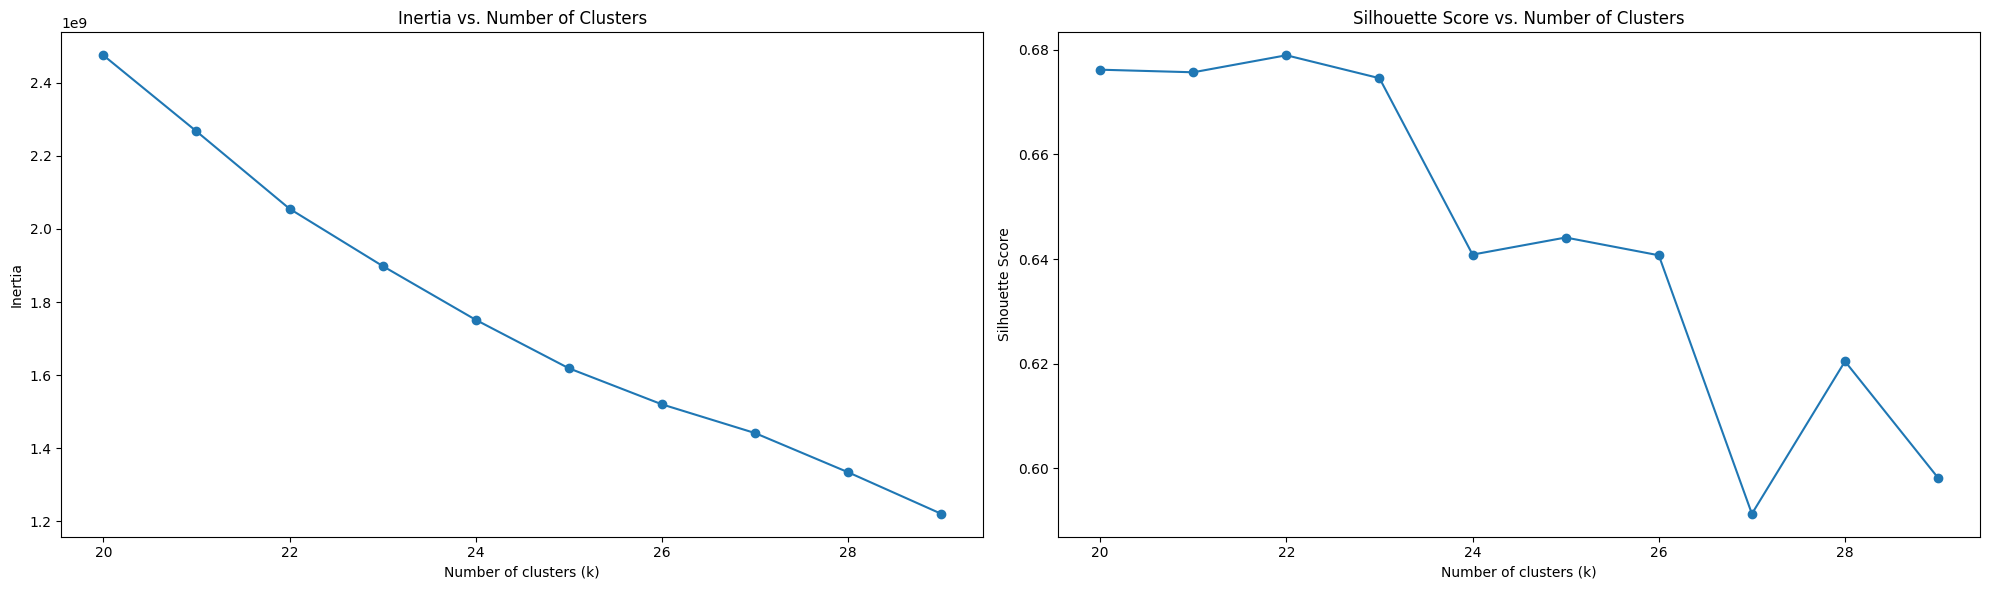

In [106]:
KmeansMethod(data_cluster,20,30)

In [109]:
kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(data_cluster)

Fitting K-means: 100%|███████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.49it/s]


In [110]:
cluster_labels = kmeans.labels_

In [113]:
data_cluster['cluster'] = cluster_labels

In [114]:
data_cluster

,popularity,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,Poland,Brazil,Switzerland,Argentina,Ireland,Czech Republic,Norway,Austria,Hungary,Greece,Turkey,Israel,Romania,South Africa,New Zealand,Taiwan,Portugal,Thailand,Serbia,Iran,Luxembourg,Philippines,Croatia,Iceland,Chile,Bulgaria,Estonia,Ukraine,Singapore,Bosnia and Herzegovina,Lithuania,Colombia,Slovenia,Indonesia,Morocco,Georgia,Peru,Slovakia,Latvia,United Arab Emirates,Egypt,Cuba,Kazakhstan,Venezuela,Soviet Union,Tunisia,Uruguay,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country,English,Français,Deutsch,Español,Italiano,...,Brian Trenchard-Smith,Sergio Corbucci,Rudolph Maté,Jacques Rivette,Stuart Heisler,Luchino Visconti,Alfred E. Green,Vincent Sherman,Chang Cheh,Enzo G. Castellari,Hong Sang-soo,Ryan Polito,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagisa Ōshima,Dav

In [116]:
data_cluster['cluster'].value_counts()

0     24496
16     5048
11     2029
9      1138
15      735
6       502
20      358
10      305
25      209
3       153
21      138
8       115
23       73
12       59
1        52
24       38
14       33
7        31
17       30
4        24
22       23
13       17
2        10
5         4
19        3
18        2
Name: cluster, dtype: int64

In [4]:
movies_metadata = pd.read_csv('../encoding/encoded/movies_with_continent_encoded.csv')

In [5]:
movies_metadata

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,svenska,한국어/조선말,Polski,广州话 / 廣州話,Magyar,العربية,suomi,Nederlands,No Language,Dansk,Český,עִבְרִית,Türkçe,ελληνικά,ภาษาไทย,Norsk,Latin,فارسی,Română,Srpski,தமிழ்,తెలుగు,Tiếng Việt,Íslenska,Hrvatski,اردو,Eesti,Український,বাংলা,Bahasa indonesia,Català,български език,Bosanski,ქართული,shqip,Afrikaans,Slovenčina,Lietuvikai,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year,Runtime Category,Vote,women_actors_count,men_actors_count,Bess Flowers,Christopher Lee,Samuel L. Jackson,John Wayne,Jackie Chan_x,John Carradine,Gérard Depardieu,...,Ryan Polito,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagisa Ōshima,David Hand,Leo McCarey,Wilfred Jackson,Arthur Penn,David Lean,Edmund Goulding,John Boorman,Bob Clark,Jackie Chan_y,Guy Hamilton,Kinji Fukasaku,Nathan H. Juran,Llo

In [8]:
movies_metadata.columns.tolist()

['id',
 'imdb_id',
 'popularity',
 'release_date',
 'runtime',
 'vote_average',
 'vote_count',
 'adult_False',
 'adult_True',
 'Single',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'original_language_ar',
 'original_language_cn',
 'original_language_cs',
 'original_language_da',
 'original_language_de',
 'original_language_el',
 'original_language_en',
 'original_language_es',
 'original_language_fa',
 'original_language_fi',
 'original_language_fr',
 'original_language_he',
 'original_language_hi',
 'original_language_hu',
 'original_language_it',
 'original_language_ja',
 'original_language_ko',
 'original_language_nl',
 'original_language_no',
 'original_language_others',
 'original_language_pl',
 'original_language_pt',
 'original_language_ro',
 'original_language_ru',
 'original_lang

In [17]:
need_to_scale = ['runtime','Vote','vote_average','vote_count','popularity',"year"]

In [18]:
data_cluster = movies_metadata.copy()

In [25]:
scaler = StandardScaler()
data_cluster[need_to_scale] = scaler.fit_transform(data_cluster[need_to_scale])

In [27]:
data_cluster.drop(['id', 'imdb_id','release_date'], axis=1,inplace = True)

In [28]:
data_cluster

,popularity,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,svenska,한국어/조선말,Polski,广州话 / 廣州話,Magyar,العربية,suomi,Nederlands,No Language,Dansk,Český,עִבְרִית,Türkçe,ελληνικά,ภาษาไทย,Norsk,Latin,فارسی,Română,Srpski,தமிழ்,తెలుగు,Tiếng Việt,Íslenska,Hrvatski,اردو,Eesti,Український,বাংলা,Bahasa indonesia,Català,български език,Bosanski,ქართული,shqip,Afrikaans,Slovenčina,Lietuvikai,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year,Runtime Category,Vote,women_actors_count,men_actors_count,Bess Flowers,Christopher Lee,Samuel L. Jackson,John Wayne,Jackie Chan_x,John Carradine,Gérard Depardieu,Michael Caine,Donald Sutherland,Robert De Niro,...,Ryan Polito,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagisa Ōshima,David Hand,Leo McCarey,Wilfred Jackson,Arthur Penn,David Lean,Edmund Goulding,John Boorman,Bob Clark,Jackie Chan_y,Guy Hamilton,Kinji Fukas

Silhouette scores (sorted in descending order):
Silhouette score for k=10: 0.8294962898546584
Silhouette score for k=11: 0.797762009293563
Silhouette score for k=13: 0.7861259674868813
Silhouette score for k=12: 0.77983106884525
Silhouette score for k=15: 0.7487426320017865
Silhouette score for k=14: 0.7486895276581591
Silhouette score for k=16: 0.746326587674147
Silhouette score for k=17: 0.7438140866272546
Silhouette score for k=18: 0.7057783857886655
Silhouette score for k=19: 0.7049000451751631
Silhouette score for k=21: 0.7002388672078288
Silhouette score for k=22: 0.6715360300901888
Silhouette score for k=20: 0.6710734405661882
Silhouette score for k=23: 0.6623187769548532
Silhouette score for k=24: 0.6443177593979084
Silhouette score for k=25: 0.6211728589897857
Silhouette score for k=27: 0.6208170136714237
Silhouette score for k=26: 0.6057247095721651
Silhouette score for k=28: 0.6055657601503895
Silhouette score for k=29: 0.5857060135568023


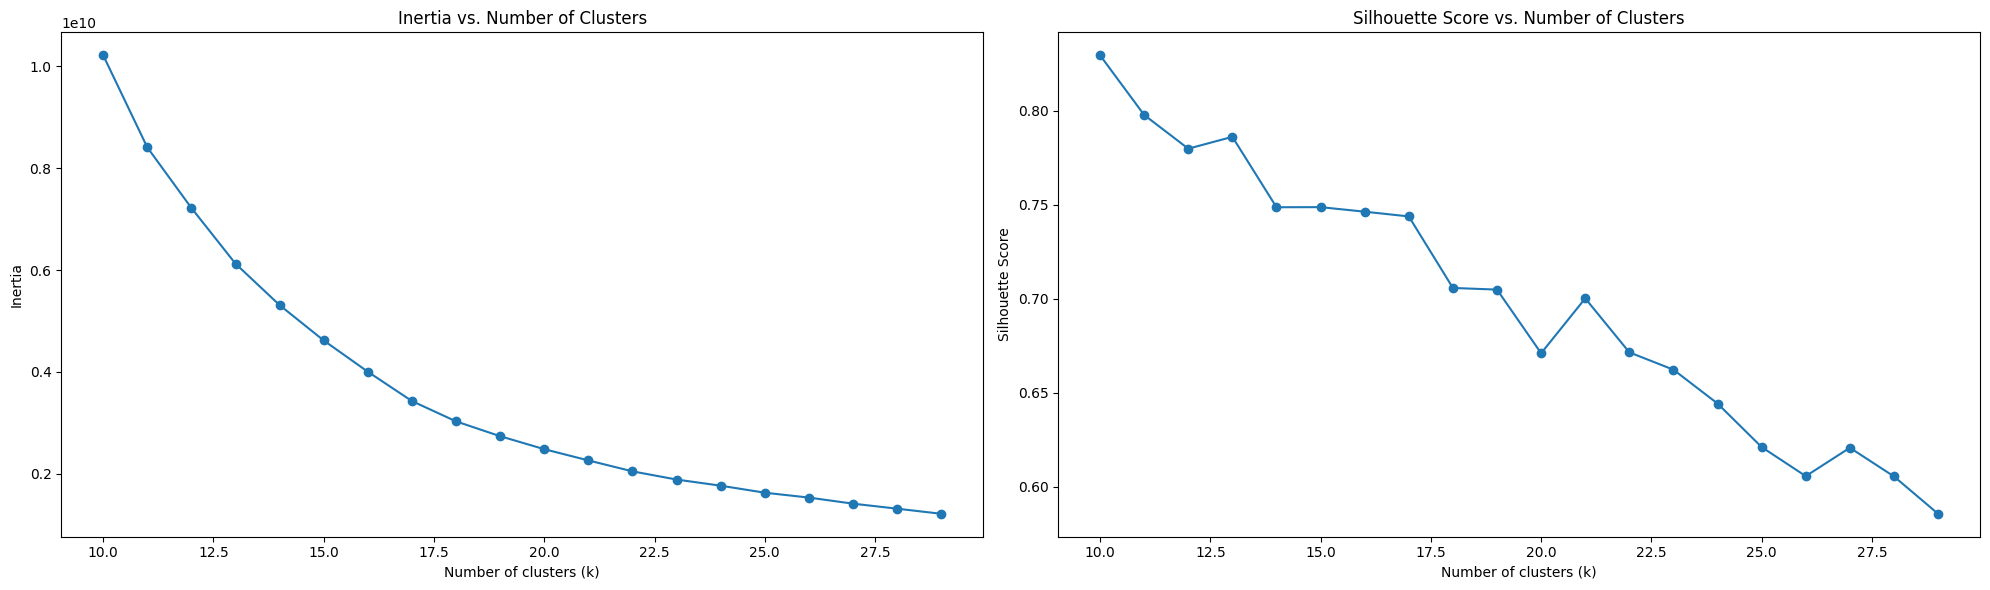

In [83]:
KmeansMethod(data_cluster,20,30)

In [26]:
rating = ['popularity','vote_average','vote_count','Vote']
data_cluster_rating = data_cluster[rating]

In [28]:
data_cluster.drop(['popularity','vote_average','vote_count','Vote'], axis=1,inplace = True)

Silhouette scores (sorted in descending order):
Silhouette score for k=3: 0.46671994335594147
Silhouette score for k=5: 0.46460093005015524
Silhouette score for k=2: 0.43980764832890457
Silhouette score for k=4: 0.42576448331723105
Silhouette score for k=6: 0.3985989769901461
Silhouette score for k=10: 0.39691498183384955
Silhouette score for k=9: 0.3897824121315176
Silhouette score for k=7: 0.3879538350582579
Silhouette score for k=8: 0.37976052779692526
Silhouette score for k=11: 0.34201177289640555


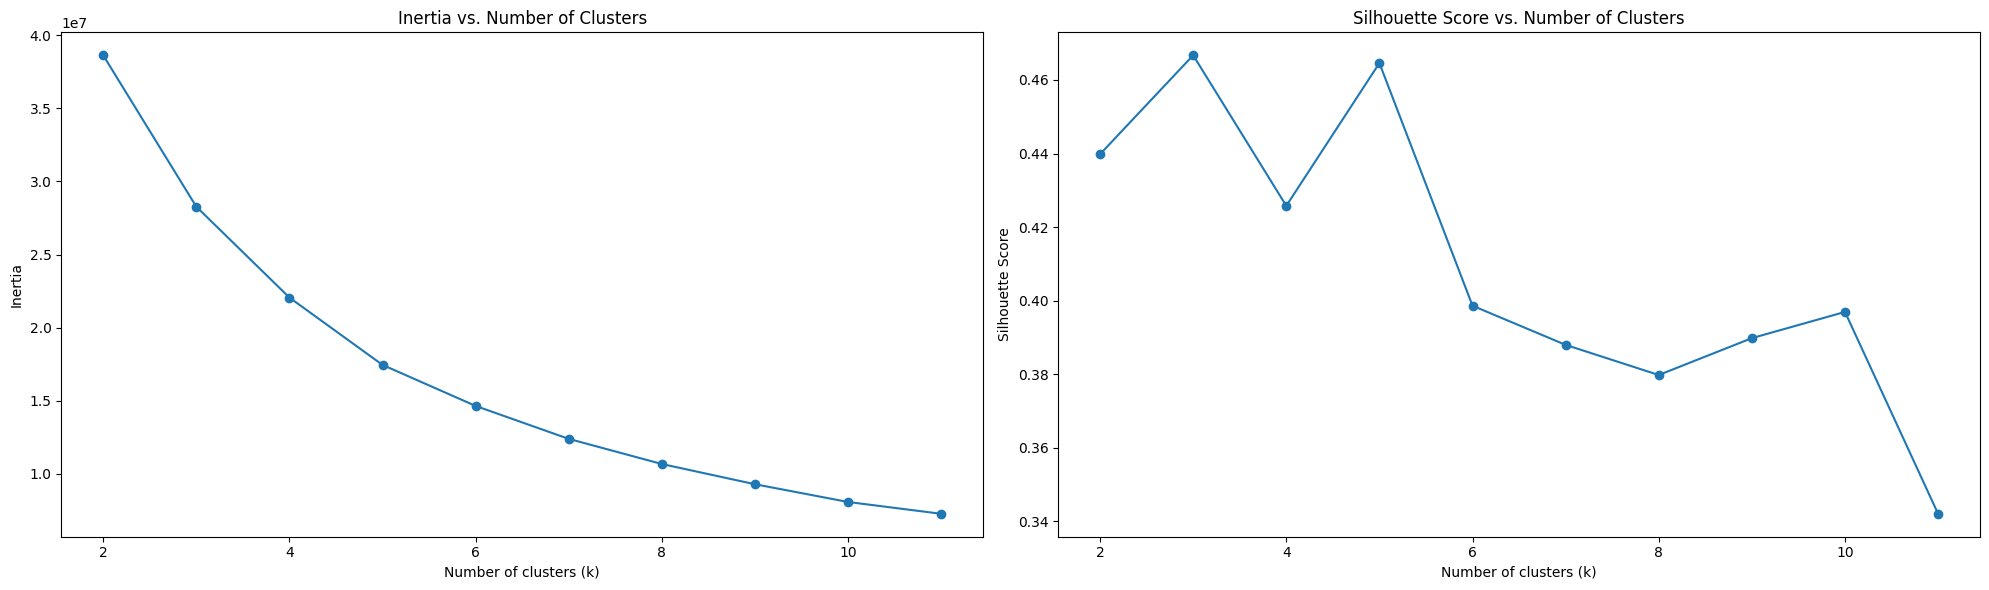

In [30]:
KmeansMethod(data_cluster,2,12)

In [63]:
countries = movies_metadata.columns.tolist()[171:248]
countries.append("id")

In [67]:
data = movies_metadata[countries]

In [66]:
country_df

,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,Poland,Brazil,Switzerland,Argentina,Ireland,Czech Republic,Norway,Austria,Hungary,Greece,Turkey,Israel,Romania,South Africa,New Zealand,Taiwan,Portugal,Thailand,Serbia,Iran,Luxembourg,Philippines,Croatia,Iceland,Chile,Bulgaria,Estonia,Ukraine,Singapore,Bosnia and Herzegovina,Lithuania,Colombia,Slovenia,Indonesia,Morocco,Georgia,Peru,Slovakia,Latvia,United Arab Emirates,Egypt,Cuba,Kazakhstan,Venezuela,Soviet Union,Tunisia,Uruguay,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country,id
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,862
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8844
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15602
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31357
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36378,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,289923
36379,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222848
36380,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30840
36381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111109


In [74]:
features = data.drop(['id'], axis=1)

similarity_matrix = csr_matrix((len(data), len(data)), dtype=float)

# Calculate the similarity matrix based on 0/1 features using Jaccard Similarity
total_iterations = len(features) * (len(features) - 1) // 2
with tqdm(total=total_iterations, desc='Calculating similarity') as pbar:
    current_iteration = 0
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            movie1 = features.iloc[i].values
            movie2 = features.iloc[j].values
            similarity = jaccard_score(movie1, movie2)
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

            current_iteration += 1
            pbar.update(1)

# Print the similarity matrix
print(similarity_matrix)

Calculating similarity:   0%|                                           | 76332/661843153 [05:08<742:04:48, 247.71it/s]

KeyboardInterrupt



In [87]:
movies_metadata_new = pd.read_csv('../encoding/encoded/movies_metadata3_encoded.csv')

In [88]:
movies_metadata_new

,id,imdb_id,popularity,release_date,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,India,Hong Kong,Sweden,Australia,South Korea,Belgium,Denmark,Netherlands,China,Finland,Mexico,Poland,Brazil,Switzerland,Argentina,Ireland,Czech Republic,Norway,Austria,Hungary,Greece,Turkey,Israel,Romania,South Africa,New Zealand,Taiwan,Portugal,Thailand,Serbia,Iran,Luxembourg,Philippines,Croatia,Iceland,Chile,Bulgaria,Estonia,Ukraine,Singapore,Bosnia and Herzegovina,Lithuania,Colombia,Slovenia,Indonesia,Morocco,Georgia,Peru,Slovakia,Latvia,United Arab Emirates,Egypt,Cuba,Kazakhstan,Venezuela,Soviet Union,Tunisia,Uruguay,Pakistan,Macedonia,Lebanon,Qatar,Senegal,Malaysia,Puerto Rico,Algeria,Palestinian Territory,others_country,English,Français,...,Jules Dassin,Brian Trenchard-Smith,Sergio Corbucci,Rudolph Maté,Jacques Rivette,Stuart Heisler,Luchino Visconti,Alfred E. Green,Vincent Sherman,Chang Cheh,Enzo G. Castellari,Hong Sang-soo,Ryan Polito,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagis

In [117]:
need_to_scale = ['runtime','Vote','vote_count','popularity']

In [118]:
data_cluster = movies_metadata_new.copy()

In [103]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster[need_to_scale])

In [104]:
data_cluster.drop(['id', 'imdb_id','release_date'], axis=1,inplace = True)

In [105]:
from tqdm import tqdm

def KmeansMethod(dataset, minK, maxK): 
    inertia = []
    silhouette_scores = []
    silhouette_dict = {}  # Dictionary to store silhouette scores
    k_values = range(minK, maxK)  # Test values of k from minK to maxK

    for k in tqdm(k_values, desc="Running K-means", unit="k"):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(dataset)
        inertia.append(kmeans.inertia_)
        silhouette_score_k = silhouette_score(dataset, kmeans.labels_)
        silhouette_scores.append(silhouette_score_k)
        silhouette_dict[k] = silhouette_score_k
        
    sorted_scores = sorted(silhouette_dict.items(), key=lambda x: x[1], reverse=True)

    # Print all silhouette scores in sorted order
    print("Silhouette scores (sorted in descending order):")
    for k, score in sorted_scores:
        print(f"Silhouette score for k={k}: {score}")
        
    # Plotting inertia and silhouette score
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia vs. Number of Clusters')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')

    plt.tight_layout()
    plt.show()


Running K-means: 100%|███████████████████████████████████████████████████████████████████| 5/5 [13:04<00:00, 156.87s/k]


Silhouette scores (sorted in descending order):
Silhouette score for k=25: 0.08629744232868966
Silhouette score for k=26: 0.08186618115629468
Silhouette score for k=27: 0.07960554064138867
Silhouette score for k=29: 0.0762451582284441
Silhouette score for k=28: 0.07284609159717903


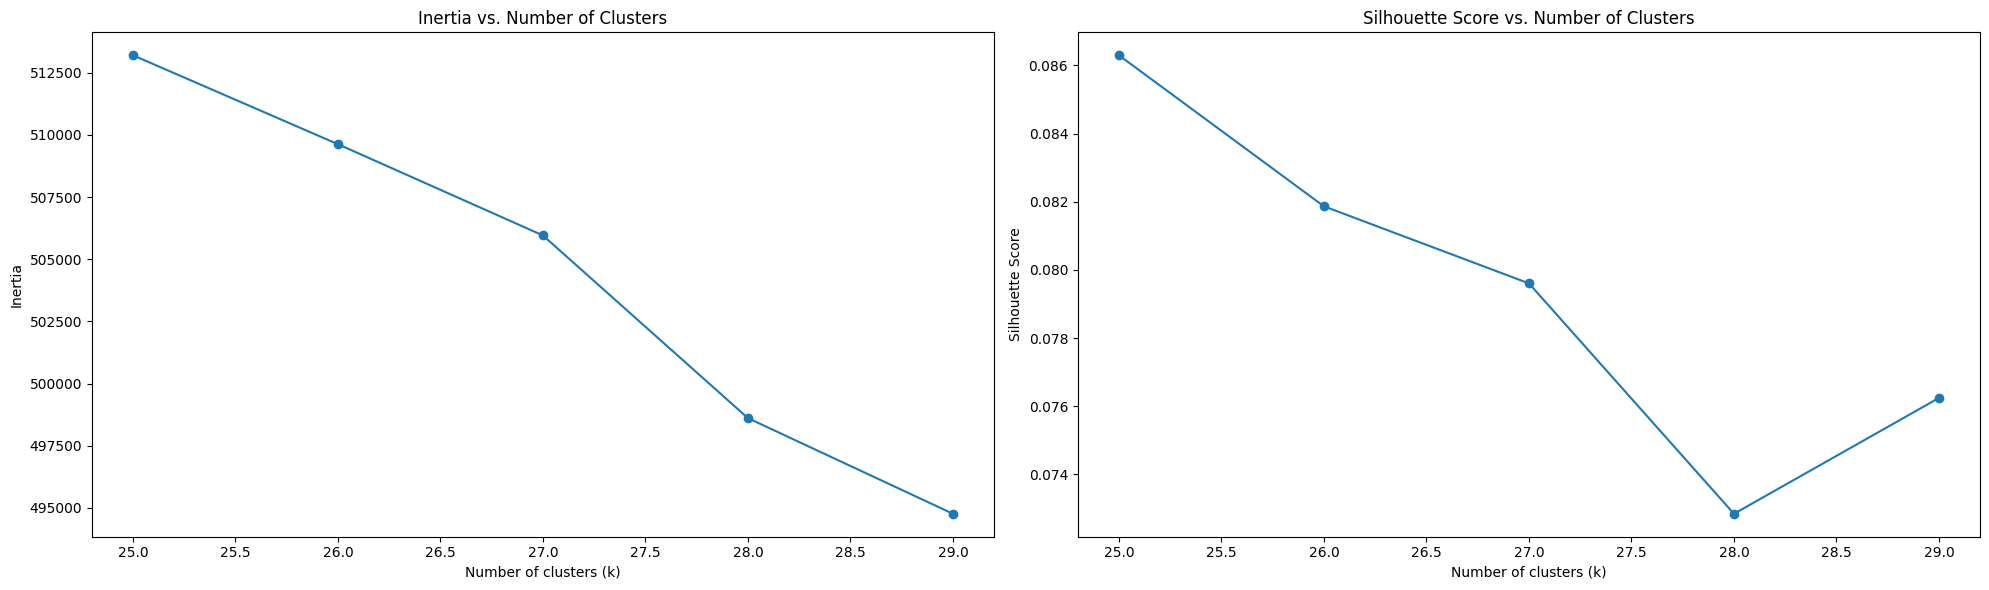

In [30]:
KmeansMethod(data_cluster,25,30)

In [31]:
kmeans = KMeans(n_clusters=26, random_state=42)
kmeans.fit(data_cluster)

KMeans(n_clusters=26, random_state=42)

In [32]:
cluster_labels = kmeans.labels_

In [33]:
data_cluster['cluster'] = cluster_labels

In [34]:
data_cluster

,popularity,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,svenska,한국어/조선말,Polski,广州话 / 廣州話,Magyar,العربية,suomi,Nederlands,No Language,Dansk,Český,עִבְרִית,Türkçe,ελληνικά,ภาษาไทย,Norsk,Latin,فارسی,Română,Srpski,தமிழ்,తెలుగు,Tiếng Việt,Íslenska,Hrvatski,اردو,Eesti,Український,বাংলা,Bahasa indonesia,Català,български език,Bosanski,ქართული,shqip,Afrikaans,Slovenčina,Lietuvikai,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year,Runtime Category,Vote,women_actors_count,men_actors_count,Bess Flowers,Christopher Lee,Samuel L. Jackson,John Wayne,Jackie Chan_x,John Carradine,Gérard Depardieu,Michael Caine,Donald Sutherland,Robert De Niro,...,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagisa Ōshima,David Hand,Leo McCarey,Wilfred Jackson,Arthur Penn,David Lean,Edmund Goulding,John Boorman,Bob Clark,Jackie Chan_y,Guy Hamilton,Kinji Fukasaku,Nathan H

In [35]:
data_cluster['cluster'].value_counts()

2     4696
17    4462
4     4044
19    3562
0     2838
24    2803
9     2244
6     2175
18    1603
25    1227
16    1223
7     1056
3     1011
13     884
12     417
11     381
23     277
21     248
15     113
1       94
8       89
20      89
22      45
10      18
14      14
5       12
Name: cluster, dtype: int64

In [39]:
cl_2 = data_cluster[data_cluster["cluster"] == 2]

In [41]:
cl_2.describe()

,popularity,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,svenska,한국어/조선말,Polski,广州话 / 廣州話,Magyar,العربية,suomi,Nederlands,No Language,Dansk,Český,עִבְרִית,Türkçe,ελληνικά,ภาษาไทย,Norsk,Latin,فارسی,Română,Srpski,தமிழ்,తెలుగు,Tiếng Việt,Íslenska,Hrvatski,اردو,Eesti,Український,বাংলা,Bahasa indonesia,Català,български език,Bosanski,ქართული,shqip,Afrikaans,Slovenčina,Lietuvikai,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year,Runtime Category,Vote,women_actors_count,men_actors_count,Bess Flowers,Christopher Lee,Samuel L. Jackson,John Wayne,Jackie Chan_x,John Carradine,Gérard Depardieu,Michael Caine,Donald Sutherland,Robert De Niro,...,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagisa Ōshima,David Hand,Leo McCarey,Wilfred Jackson,Arthur Penn,David Lean,Edmund Goulding,John Boorman,Bob Clark,Jackie Chan_y,Guy Hamilton,Kinji Fukasaku,Nathan H

In [43]:
cl_17 = data_cluster[data_cluster["cluster"] == 17]
cl_17.describe()

,popularity,runtime,vote_average,vote_count,adult_False,adult_True,Single,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language_ar,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_nl,original_language_no,original_language_others,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_zh,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Paramount Pictures,Universal Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures Corporation,Canal+,Columbia Pictures,RKO Radio Pictures,United Artists,New Line Cinema,Walt Disney Pictures,Touchstone Pictures,TriStar Pictures,Mosfilm,Miramax Films,France 2 Cinéma,Centre National de la Cinématographie (CNC),Toho Company,BBC Films,Gaumont,StudioCanal,Relativity Media,TF1 Films Production,British Broadcasting Corporation (BBC),Walt Disney Productions,Orion Pictures,Village Roadshow Pictures,Regency Enterprises,Lionsgate,Universal International Pictures (UI),Dimension Films,DreamWorks SKG,Wild Bunch,Zweites Deutsches Fernsehen (ZDF),Fox Searchlight Pictures,American International Pictures (AIP),Hammer Film Productions,Working Title Films,Svensk Filmindustri (SF),Channel Four Films,Rai Cinema,Hollywood Pictures,Film i Väst,Film4,Nordisk Film,Lions Gate Films,Millennium Films,Amblin Entertainment,CJ Entertainment,Castle Rock Entertainment,Shaw Brothers,Summit Entertainment,The Rank Organisation,Arte France Cinéma,Westdeutscher Rundfunk (WDR),HBO Films,First National Pictures,Shôchiku Eiga,France 3 Cinéma,New World Pictures,CinéCinéma,Nikkatsu,PolyGram Filmed Entertainment,Home Box Office (HBO),Imagine Entertainment,Eurimages,Ciné+,Dune Entertainment,Fox 2000 Pictures,Monogram Pictures,Warner Bros. Animation,UK Film Council,EuropaCorp,TLA Releasing,BBC,DC Comics,Focus Features,Fox Film Corporation,New Regency Pictures,Morgan Creek Productions,Screen Gems,Nu Image Films,Téléfilm Canada,M6 Films,The Weinstein Company,Lakeshore Entertainment,Televisión Española (TVE),Hallmark Entertainment,Canal+ España,Pathé,Blumhouse Productions,Silver Pictures,Lenfilm,Zentropa Entertainments,Constantin Film Produktion,Golden Harvest Company,Fine Line Features,Davis Entertainment,others_companies,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,company_10,United States of America,United Kingdom,France,Germany,Italy,Canada,Japan,Spain,Russia,English,Français,Deutsch,Español,Italiano,日本語,Pусский,普通话,हिन्दी,Português,svenska,한국어/조선말,Polski,广州话 / 廣州話,Magyar,العربية,suomi,Nederlands,No Language,Dansk,Český,עִבְרִית,Türkçe,ελληνικά,ภาษาไทย,Norsk,Latin,فارسی,Română,Srpski,தமிழ்,తెలుగు,Tiếng Việt,Íslenska,Hrvatski,اردو,Eesti,Український,বাংলা,Bahasa indonesia,Català,български език,Bosanski,ქართული,shqip,Afrikaans,Slovenčina,Lietuvikai,Slovenščina,Kiswahili,Gaeilge,Latviešu,isiZulu,ਪੰਜਾਬੀ,euskera,Bahasa melayu,Wolof,others_spoken_languages,year,Runtime Category,Vote,women_actors_count,men_actors_count,Bess Flowers,Christopher Lee,Samuel L. Jackson,John Wayne,Jackie Chan_x,John Carradine,Gérard Depardieu,Michael Caine,Donald Sutherland,Robert De Niro,...,Christian Duguay,Mike Newell,Chris Columbus,Paul Verhoeven,Martha Coolidge,Atom Egoyan,Richard Benjamin,Sam Raimi,Phillip Noyce,Russ Meyer,Simon Wincer,Bille August,Daniel Petrie,Nagisa Ōshima,David Hand,Leo McCarey,Wilfred Jackson,Arthur Penn,David Lean,Edmund Goulding,John Boorman,Bob Clark,Jackie Chan_y,Guy Hamilton,Kinji Fukasaku,Nathan H

In [44]:
cl_17.columns.get_loc('Claude Zidi')

1642

In [ ]:
user_profile = ["Asia_West","Adventure"]

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

feature_columns = ['genre_action', 'genre_comedy', 'genre_drama', 'year', 'duration', 'actor_1', 'actor_2', 'director']
feature_df = movies_df[feature_columns]
feature_matrix = feature_df.to_numpy()
feature_matrix_normalized = feature_matrix / np.linalg.norm(feature_matrix, axis=1, keepdims=True)
similarity_matrix = cosine_similarity(feature_matrix_normalized)

print(similarity_matrix)
